In [1]:
import tensorflow as tf
import numpy as np

In [2]:
fmnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


pixel values [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43
   60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248
  255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3  

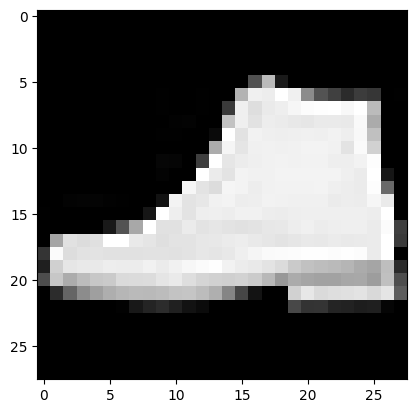

In [8]:
##plotting an image from the dataset

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100)

print("pixel values",train_images[42])
plt.imshow(train_images[42],cmap="gray")

In [9]:
#Normalizing the pixel values
train_images=train_images/255.0  #pixel values are between 0 to 255
test_images=test_images/255.0



In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_labels.shape

(60000,)

In [13]:
#Build the classification model

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [14]:
model=Sequential([Flatten(),
                  Dense(units=128,activation=tf.nn.relu),
                  Dense(10,activation=tf.nn.softmax)])

In [18]:
inputs=np.array([-1,1,2,3],dtype=float)
inputs=tf.convert_to_tensor(inputs)
print(inputs)
print(inputs.get_shape())

tf.Tensor([-1.  1.  2.  3.], shape=(4,), dtype=float64)
(4,)


In [20]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4974 - accuracy: 0.8245
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3760 - accuracy: 0.8643
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3340 - accuracy: 0.8773
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.8857
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2929 - accuracy: 0.8917
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.8964
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.9016
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2553 - accuracy: 0.9055
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2445 - accuracy: 0.9094
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.235

In [21]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.5368 - accuracy: 0.8881


[0.5368049144744873, 0.8881000280380249]

In [22]:
classifications=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
classifications[0]

array([5.3189030e-25, 1.5554878e-27, 6.6041542e-23, 1.3188395e-23, 1.0303054e-27, 1.3638420e-09,
       7.7753199e-19, 2.6671049e-05, 9.9107437e-18, 9.9997324e-01], dtype=float32)

In [37]:
test_labels[0]
test_labels.shape

(10000,)

In [41]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:

predictions=np.argmax(classifications,axis=1)
predictions
predictions.shape


(10000,)

<Axes: >

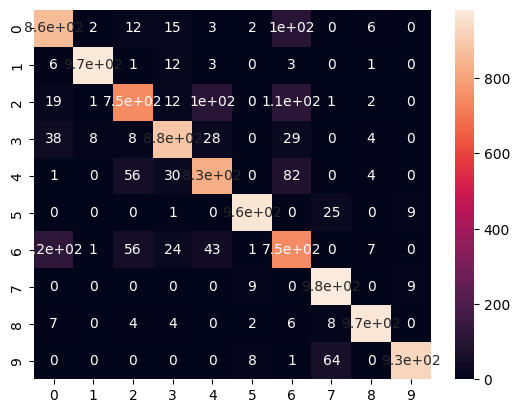

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(test_labels,predictions)
sns.heatmap(cm,annot=True)

In [42]:
#Experimentation

In [43]:
#Without Normalizing 

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 4.8535
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5514
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5080
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5121
Epoch 5/5
313/313 [==============================] - 2s 6ms/step
[3.2905919e-15 1.8760492e-08 9.2658692e-16 5.1764631e-11 5.1915080e-20 6.0938774e-03 1.7753530e-13
 6.4352416e-02 9.2809149e-10 9.2955369e-01]
9


In [46]:
#Defining callbacks for stopping at 66 % accuracy

class myCallback(tf.keras.callbacks.Callback): #defining a class that inherits the tf.keras.callbacks.Callback base class
     def on_epoch_end(self,epochs,logs={}): #logs (dict) - metric results from the training epoch # you can only call/ modify a function 
     #who is a member of the
     #base class here on_epoch_end is a defined member of the tf.keras.callbacks.Callbcak class

     # Check accuracy
      if(logs.get('accuracy')>=0.66):

        # Stop if threshold is met
        print("\n Reached 66% accuarcy so stopping training!")
        self.model.stop_training=True


callbacks=myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

#By having a callback at each end of the epoch, it is able to check the training parameters and compare if it 
#meets the threshold you set in the function definition.

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.8310
 Reached 66% accuarcy so stopping training!
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4718 - accuracy: 0.8310
